# Практическая работа 12

Ансамбль моделей.

In [176]:
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import tree

import plotly.express as px
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import time
import math
import operator
import random

In [187]:
df = pd.read_csv("possum.csv")
data = df.drop(columns=["case", "site", "Pop", "sex"])
data = data.sample(frac=1).reset_index(drop=True)
data = data.dropna()
data

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,6.0,92.8,57.6,90.0,40.0,65.7,42.8,15.0,27.5,34.0
1,7.0,95.7,59.0,86.0,38.0,63.1,44.9,15.0,26.5,31.0
2,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0
3,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
4,3.0,91.0,53.1,86.0,38.0,63.8,46.0,14.5,25.0,31.5
...,...,...,...,...,...,...,...,...,...,...
99,4.0,95.1,59.4,93.0,41.0,67.2,45.3,14.5,31.0,39.0
100,2.0,91.3,57.7,88.0,39.0,63.1,47.0,14.4,26.0,30.0
101,3.0,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0
102,2.0,90.7,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0


In [188]:
predicts = data.drop(columns=['age'])
target = data['age']
print(f"X shape: {predicts.shape}\ny shape: {target.shape}")

X shape: (101, 9)
y shape: (101,)


## Бэггинг

In [185]:
class Bagging:
    def __init__(self, x: np.ndarray, y: np.ndarray):
        self.x = x.tolist()
        self.y = y.tolist()
        self.x_datasets = []
        self.y_datasets = []
        self.times = []
        buffer_x = []
        buffer_y = []
        for i in range(10):
            for j in range(50):
                buffer_x.append(random.choice(self.x))
                buffer_y.append(random.choice(self.y))
            self.x_datasets.append(buffer_x)
            self.y_datasets.append(buffer_y)
            buffer_x = []
            buffer_y = []

    def __call__(self, *args, **kwargs):
        models = []
        for i in range(10):
            self.x_datasets[i] = np.array(self.x_datasets[i])
            start_time = time.time()
            model_tree = tree.DecisionTreeRegressor(max_depth=8)
            model_tree.fit(self.x_datasets[i].reshape(-1, 1), self.y_datasets[i])
            end_time = time.time()
            models.append(model_tree)
            self.times.append(end_time-start_time)
        y_pred = []
        self.x = np.array(self.x)
        for i in range(len(models)):
            y_pred.append(models[i].predict(self.x.reshape(-1, 1)))

        for i in range(3):
            data = pd.DataFrame(list(zip(self.x, y_pred[i], self.y)), columns=['skullw', 'predicted_hdlngth', 'hdlngth'])
            plt.scatter(data["skullw"], data["predicted_hdlngth"], c='green')
            plt.scatter(data["skullw"], data["hdlngth"], c='blue')
            plt.xlabel("skullw")
            plt.ylabel("hdlngth")
            plt.title(f"Предсказанные значения {i+1} модели")
            plt.show()
            print(f"R2 для случайного дерева: {abs(r2_score(self.y, data['predicted_hdlngth']))}")
            print("(разница между выборками в наборе данных и прогнозами, сделанными моделью)")
            print(f"Время: {self.times[i]}")

        mean_pred = np.array(y_pred).mean(axis=0)
        data = pd.DataFrame(list(zip(self.x, self.y, mean_pred)), columns=['skullw', "hdlngth", 'mean'])
        plt.scatter(data['skullw'], data['mean'], c='green')
        plt.scatter(data["skullw"], data["hdlngth"], color='blue')
        plt.xlabel("skullw")
        plt.ylabel("hdlngth")
        plt.title(f"Предсказанные значения усредненной модели")
        plt.show()
        print(f"R2 для случайного леса: {r2_score(self.y, mean_pred)}")
        print("(разница между выборками в наборе данных и прогнозами, сделанными моделью)")

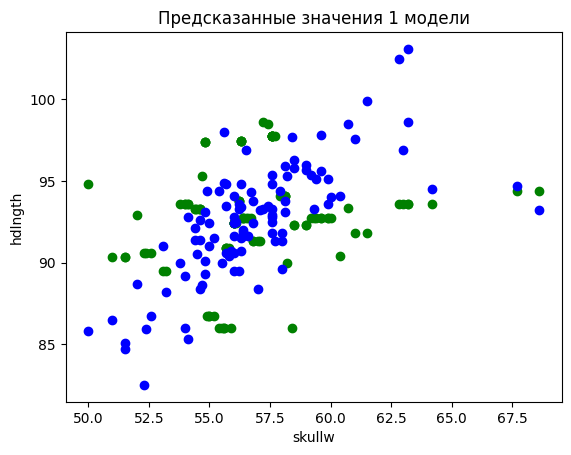

R2 для случайного дерева: 0.693644449419194
(разница между выборками в наборе данных и прогнозами, сделанными моделью)
Время: 0.0009984970092773438


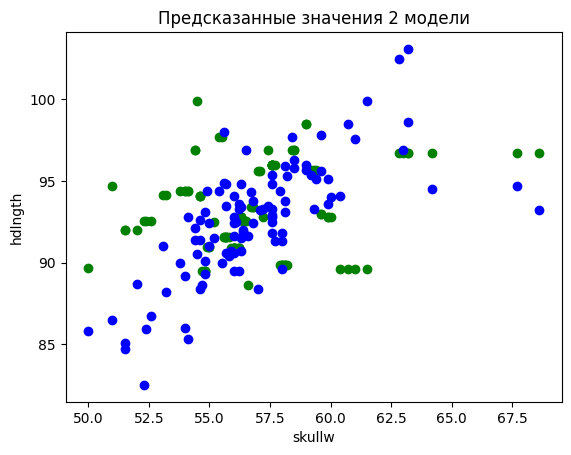

R2 для случайного дерева: 0.33041849144849067
(разница между выборками в наборе данных и прогнозами, сделанными моделью)
Время: 0.0


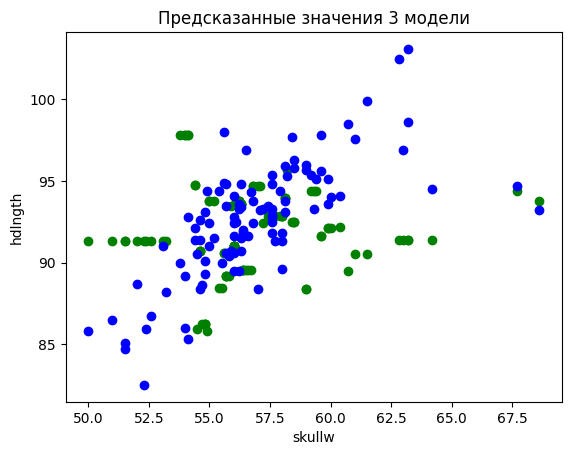

R2 для случайного дерева: 0.6471367743791478
(разница между выборками в наборе данных и прогнозами, сделанными моделью)
Время: 0.0


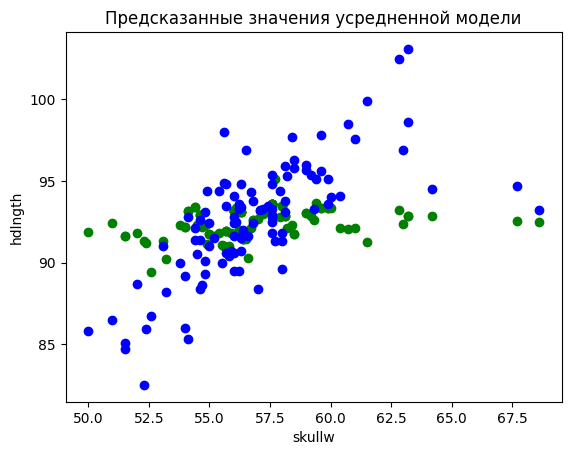

R2 для случайного леса: 0.04472414069202457
(разница между выборками в наборе данных и прогнозами, сделанными моделью)


In [186]:
Bagging(x=predicts, y=target)()

Наилучшая возможная оценка — 1,0, и она может быть отрицательной (поскольку модель может быть сколь угодно хуже)

## Бустинг

In [19]:
type(np.random.uniform(10,-10,40))

numpy.ndarray